In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
errors = []
layers = []
experts = []
for layer_id in range(32):
    for expert_id in range(8):
        es = torch.load(f"l{layer_id}_e{expert_id}.pt")
        mean_error = es.mean(dim=0)
        layers.append(layer_id)
        experts.append(expert_id)
        errors.append(mean_error.item())

In [4]:
df = pd.DataFrame({
    "Layer": layers,
    "Expert": experts,
    "Error": errors,
})

In [9]:
# normalize by layer
df["Error"] = df["Error"] / df.groupby("Layer")["Error"].transform("max")

In [11]:
df["Expert"] = df["Expert"].astype(str)

<Axes: xlabel='Layer', ylabel='Error'>

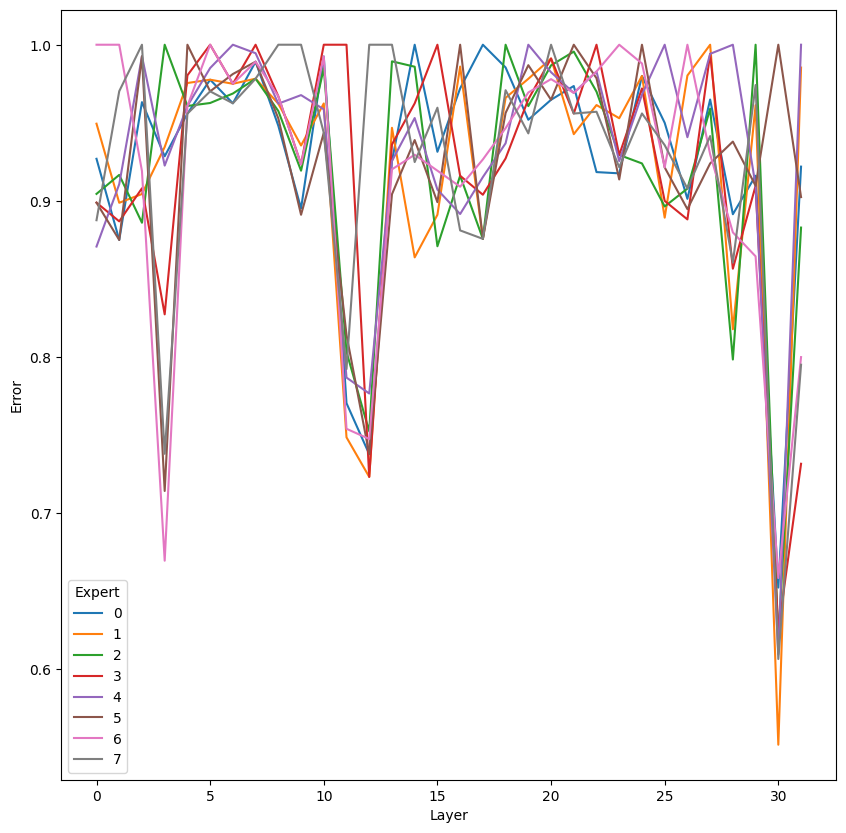

: 

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=df, x="Layer", y="Error", hue="Expert", ax=ax)